# Laboratorio 1. CNYT
*Martes 11 de agosto de 2020* / 
**Nombre: Ana Gabriela Silva**

## Experimentos básicos en computación cuántica usando Qiskit

### 1. Qubits, iniciallización y medición

In [3]:
#Importación
from qiskit import QuantumCircuit #Clase para crear circuitos
from qiskit import execute #Función para ejecutar simulaciones o trabajos en computadores cuánticos reales.
from qiskit import Aer #Módulo donde encontramos el acceso al simulador
from qiskit.visualization import plot_histogram #Visualizador del output como gráfico de barras
%matplotlib inline 

**1.1.Experimento:** Cuando un qubit está inicializado en $|0\rangle$ el resultado de la medición debe ser, en teoría, siempre $|0\rangle$ (con 100% de probabilidad). 1 shot.

In [6]:
#Declaro y lleno un circuito
circuito_exp_11 = QuantumCircuit(1,1) # 1 alambre cuántico (1 qubit) y un alambre clásico (1 medida)
circuito_exp_11.measure(0,0) #Pongo como argumento los subíndices correspondientes

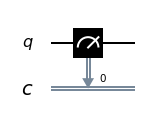

In [8]:
#Dibujo el circuito
circuito_exp_11.draw(output='mpl')

In [12]:
#Simulamos una ejecución 
simulador = Aer.get_backend('qasm_simulator')
ejecucion = execute(circuito_exp_11, backend = simulador,shots=1)
resultado = ejecucion.result()
conteos = resultado.get_counts()
print(conteos)

{'0': 1}


In [2]:
plot_histogram(conteos)

NameError: name 'plot_histogram' is not defined

**Conclusiones 1.1.** Este experimento se ejecutó en el backend **qasm_simulator**. Se esperaba que el resulado de la única ejecución correspondieran al estado $|0\rangle$. Y así fue, se cumplió lo esperado que era el 100 porciento de probabilidad en el estado $|0\rangle$.

**1.2.Experimento:** Cuando un qubit está inicializado en $|0\rangle$ el resultado de la medición debe ser, en teoría, siempre $|0\rangle$ (con 100% de probabilidad). 1000 shots.

In [21]:
#Declaro y lleno un circuito
circuito_exp_12 = QuantumCircuit(1,1) 
circuito_exp_12.measure(0,0)

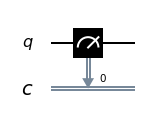

In [17]:
#Dibujo
circuito_exp_12.draw(output='mpl')

In [19]:
#El simulador no es necesario ponerlo de nuevo
ejecucion = execute(circuito_exp_12, backend = simulador,shots=1000)
resultado = ejecucion.result()
conteos2 = resultado.get_counts()
print(conteos2)

{'0': 1000}


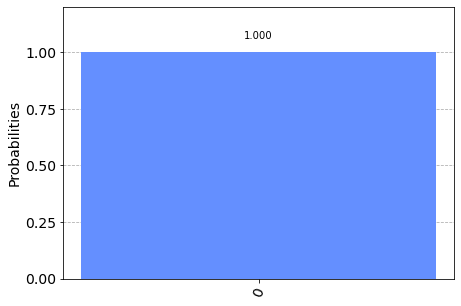

In [20]:
plot_histogram(conteos2)

**Conclusiones 1.2.** Este experimento se ejecutó en el backend **qasm_simulator**. Se esperaba que el resulado de las 1000 ejecuciones correspondieran al estado $|0\rangle$. Y así fue, se cumplió lo esperado que era el 100 porciento de probabilidad en el estado $|0\rangle$.

**1.3.Experimento:** Cuando un qubit está inicializado en $|0\rangle$ el resultado de la medición debe ser, en teoría, siempre $|0\rangle$ (con 100% de probabilidad). 1000 shots en un computador cuántico real.

In [22]:
#Declaro y lleno un circuito
circuito_exp_13 = QuantumCircuit(1,1) 
circuito_exp_13.measure(0,0)

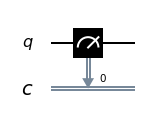

In [23]:
#Dibujo
circuito_exp_13.draw(output='mpl')

In [25]:
#Ejecucion en un computador cuántico real
from qiskit import IBMQ
IBMQ.load_account()

proveedor = IBMQ.get_provider('ibm-q')
comp_cuantico = proveedor.get_backend('ibmq_vigo')
ejecucion = execute(circuito_exp_13, backend = comp_cuantico, shots=1000)

from qiskit.tools.monitor import job_monitor

job_monitor(ejecucion)

resultado = ejecucion.result() 
conteos = resultado.get_counts()

print(conteos)

ibmqfactory.load_account:WARNING:2020-08-11 14:25:34,802: Credentials are already in use. The existing account in the session will be replaced.


Job Status: job has successfully run
{'0': 992, '1': 8}


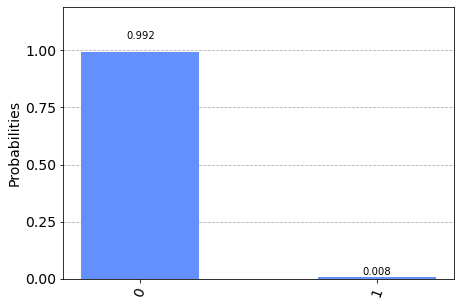

In [27]:
plot_histogram(conteos)

**Conclusiones 1.3.** Este experimento se ejecutó en el backend **ibmq_vigo**. Se esperaba que el resulado de las 1000 ejecuciones correspondieran al estado $|0\rangle$. Sin embargo:

| Resultados correctos 	| Resultados incorrectos 	|
|-	|-	|
|   0.992 	|   0.008 	|
|   99.2% 	|   0.8% 	|

El error en el 0.8% de las ejecuciones se debe a que estamos trabajando en un computador cuántico real el cual es susceptible al ruido (por ejemplo electromagnético) y a errores de medición. Llama la atención que se presenten errores aún cuando al qubit no se le aplicó ninguna transformación mediante compuertas, únicamente se realizó la medición como se puede notar en el circuito correspondiente. La diferencia entre ejecutar este circuito en el computador cuántico real y ejecutarlo en el simulador fue muy mínima ya que el en el computador cuántico el error no llego ni al uno por ciento.




**1.4.Experimento:** Cuando un qubit está inicializado en  |1⟩  el resultado de la medición debe ser, en teoría, siempre  |1⟩  (con 100% de probabilidad). Shots 1.

In [31]:
#Declaro y lleno un circuito
circuito_exp_14 = QuantumCircuit(1,1) # 1 alambre cuántico (1 qubit) y un alambre clásico (1 medida)
circuito_exp_14.x(0) #Aplico una negación en el alambre para que el qubit pase a estado |1>
circuito_exp_14.measure(0,0)

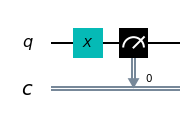

In [33]:
#Dibujo
circuito_exp_14.draw(output= 'mpl')

In [34]:
#Simulamos una ejecución 
simulador = Aer.get_backend('qasm_simulator')
ejecucion = execute(circuito_exp_14, backend = simulador,shots=1)
resultado = ejecucion.result()
conteos = resultado.get_counts()
print(conteos)

{'1': 1}


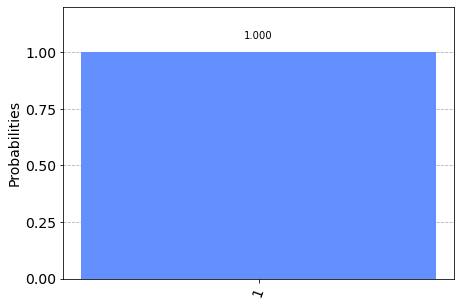

In [35]:
plot_histogram(conteos)

**Conclusiones 1.4.** Este experimento se ejecutó en el backend **qasm_simulator**. Se esperaba que el resulado de la única ejecución correspondieran al estado $|1\rangle$. Y así fue, se cumplió lo esperado que era el 100 porciento de probabilidad en el estado $|1\rangle$.

**1.5.Experimento:** Cuando un qubit está inicializado en |1⟩ el resultado de la medición debe ser, en teoría, siempre |1⟩ (con 100% de probabilidad). Shots 1000.

In [36]:
#Declaro y lleno un circuito
circuito_exp_15 = QuantumCircuit(1,1) 
circuito_exp_15.x(0) 
circuito_exp_15.measure(0,0)

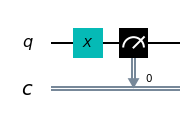

In [37]:
#Dibujo
circuito_exp_15.draw(output= 'mpl')

In [38]:
#Simulamos una ejecución 
simulador = Aer.get_backend('qasm_simulator')
ejecucion = execute(circuito_exp_15, backend = simulador,shots=1000)
resultado = ejecucion.result()
conteos = resultado.get_counts()
print(conteos)

{'1': 1000}


In [ ]:
plot_histogram(conteos)

**Conclusiones 1.5.** Este experimento se ejecutó en el backend **qasm_simulator**. Se esperaba que el resulado de las 1000 ejecuciones correspondieran al estado $|1\rangle$. Y así fue, se cumplió lo esperado que era el 100 porciento de probabilidad en el estado $|1\rangle$.

**1.6.Experimento:** Cuando un qubit está inicializado en $|1\rangle$ el resultado de la medición debe ser, en teoría, siempre $|1\rangle$ (con 100% de probabilidad). 1000 shots en un computador cuántico real.

In [40]:
#Declaro y lleno un circuito
circuito_exp_16 = QuantumCircuit(1,1) 
circuito_exp_16.x(0) 
circuito_exp_16.measure(0,0)

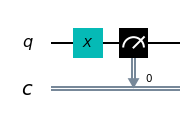

In [41]:
#Dibujo
circuito_exp_16.draw(output= 'mpl')

In [43]:
proveedor = IBMQ.get_provider('ibm-q')
comp_cuantico = proveedor.get_backend('ibmq_vigo')
ejecucion = execute(circuito_exp_16, backend = comp_cuantico, shots=1000)

job_monitor(ejecucion)

resultado = ejecucion.result() 
conteos = resultado.get_counts()

print(conteos)

Job Status: job has successfully run
{'0': 29, '1': 971}


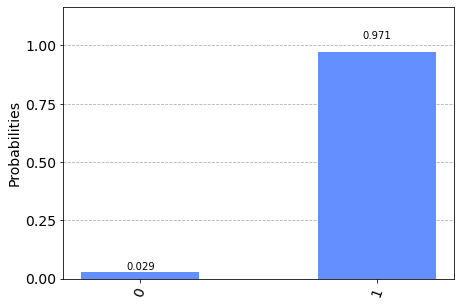

In [44]:
plot_histogram(conteos)

**Conclusiones 1.6.** Este experimento se ejecutó en el backend **ibmq_vigo**. Se esperaba que el resulado de las 1000 ejecuciones correspondieran al estado $|1\rangle$. Sin embargo:

| Resultados correctos 	| Resultados incorrectos 	|
|-	|-	|
|   0.971	|   0.029	|
|   97.1% 	|   2.9% 	|

El error en el 2.9%  de las ejecuciones se debe a que estamos trabajando en un computador cuántico real el cual es susceptible al ruido (por ejemplo electromagnético) y a errores de medición. Llama la atención que se presenten errores aún cuando al qubit no se le aplicó ninguna transformación mediante compuertas, únicamente se realizó la medición como se puede notar en el circuito correspondiente. La diferencia entre ejecutar este circuito en el computador cuántico real y ejecutarlo en el simulador fue muy mínima ya que el porcentaje de error no fue demasiado grande. La diferencia entre el estado $|1\rangle$ y $|0\rangle$, el error fue mayor para el estado $|1\rangle$.

**1.7.Experimento:** Cuando un qubit está inicializado en la superposición $$|\psi\rangle = \frac{1}{\sqrt{2}} |0\rangle + \frac{1}{\sqrt{2}}  |1\rangle$$ 

Para lograr inicializar nuestro qubit en este estado debemos aplicar una compuerta H (o una compuerta de Hadamard a nuestro qubit que por defecto venía inicializado en |0⟩.

el resultado de la medición debe ser, en teoría, |0⟩ con 50% de probabilidad y |1⟩ con 50% de probabilidad . 1 shot.

In [45]:
#Declaro y lleno un circuito
circuito_exp_17 = QuantumCircuit(1,1) 
circuito_exp_17.h(0) 
circuito_exp_17.measure(0,0)

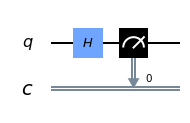

In [46]:
#Dibujo
circuito_exp_17.draw(output= 'mpl')

In [48]:
simulador = Aer.get_backend('qasm_simulator')
ejecucion = execute(circuito_exp_17, backend = simulador,shots=1)
resultado = ejecucion.result()
conteos = resultado.get_counts()
print(conteos)

{'1': 1}


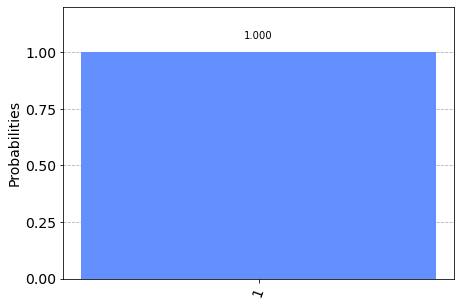

In [49]:
plot_histogram(conteos)

**Conclusiones 1.7.** Este experimento se ejecutó en el backend **qasm_simulator**. Se esperaba que el 50% de probabilidad fuera del estado $|0\rangle$ y el otro 50% del estado $|1\rangle$.De la única ejecución el resultado di al estado $|1\rangle$. No fue lo esperado ya que se realizó solo una ejecución no era posible de tener ambos estados en esta.

**1.8.Experimento:** Cuando un qubit está inicializado en la superposición $$|\psi\rangle = \frac{1}{\sqrt{2}} |0\rangle + \frac{1}{\sqrt{2}}  |1\rangle$$ 

Para lograr inicializar nuestro qubit en este estado debemos aplicar una compuerta H (o una compuerta de Hadamard a nuestro qubit que por defecto venía inicializado en |0⟩.

el resultado de la medición debe ser, en teoría, |0⟩ con 50% de probabilidad y |1⟩ con 50% de probabilidad . 1000 shots.

In [50]:
#Declaro y lleno un circuito
circuito_exp_18 = QuantumCircuit(1,1) 
circuito_exp_18.h(0) 
circuito_exp_18.measure(0,0)

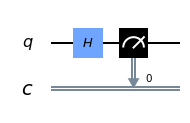

In [51]:
#Dibujo
circuito_exp_18.draw(output= 'mpl')

In [52]:
simulador = Aer.get_backend('qasm_simulator')
ejecucion = execute(circuito_exp_17, backend = simulador,shots=1000)
resultado = ejecucion.result()
conteos = resultado.get_counts()
print(conteos)

{'0': 492, '1': 508}


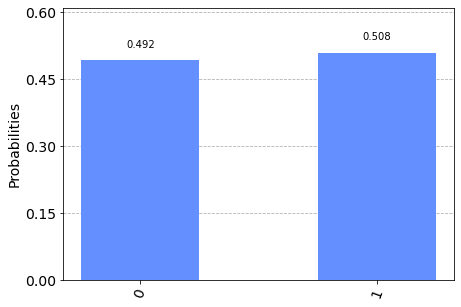

In [53]:
plot_histogram(conteos)

**Conclusiones 1.8.** Este experimento se ejecutó en el backend **qasm_simulator**. Se esperaba que el 50% de probabilidad fuera del estado $|0\rangle$ y el otro 50% del estado $|1\rangle$. Sin embargo: 

| Estado $|0\rangle$  	| Estado $|1\rangle$	|
|:-:	|:-:	|
| 0.492 	| 0.508 	|
| 49.2% 	| 50.8% 	|

Hubo una diferencia de 0.8% entre los dos estados.



**1.9.Experimento:** Cuando un qubit está inicializado en la superposición $$|\psi\rangle = \frac{1}{\sqrt{2}} |0\rangle + \frac{1}{\sqrt{2}}  |1\rangle$$ 

Para lograr inicializar nuestro qubit en este estado debemos aplicar una compuerta H (o una compuerta de Hadamard a nuestro qubit que por defecto venía inicializado en |0⟩.

el resultado de la medición debe ser, en teoría, |0⟩ con 50% de probabilidad y |1⟩ con 50% de probabilidad . Con un computador cuántico real.

In [4]:
#Declaro y lleno un circuito
circuito_exp_19 = QuantumCircuit(1,1) 
circuito_exp_19.h(0) 
circuito_exp_19.measure(0,0)

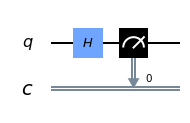

In [55]:
#Dibujo
circuito_exp_19.draw(output= 'mpl')

In [59]:
proveedor = IBMQ.get_provider('ibm-q')
comp_cuantico = proveedor.get_backend('ibmq_essex')
ejecucion = execute(circuito_exp_19, backend = comp_cuantico, shots=1000)

job_monitor(ejecucion)

resultado = ejecucion.result() 
conteos = resultado.get_counts()

print(conteos)

Job Status: job has successfully run
{'0': 498, '1': 502}


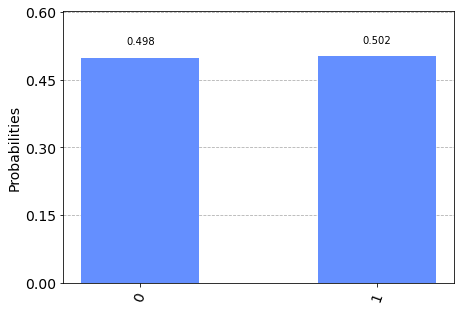

In [60]:
plot_histogram(conteos)

**Conclusiones 1.9.** Este experimento se ejecutó en el backend **ibmq_essex**. Se esperaba que el 50% de probabilidad fuera del estado $|0\rangle$ y el otro 50% del estado $|1\rangle$. Sin embargo: 

| Estado $|0\rangle$	| Estado $|1\rangle$ 	|
|:-:	|:-:	|
| 0.498	| 0.502 	|
| 49.8% 	| 50.2% 	|

Hubo una diferencia de 0.2% entre los dos estados. A diferencia del ejercicio 1.8 con el computador cuántico el error fue menor. 

### 2. Suma cuántica

Construimos un circuito que es capaz de sumar dos números de 1 bit de longitud.

In [72]:
circuito_suma = QuantumCircuit(4,2)
circuito_suma.x(0)
circuito_suma.x(1)
circuito_suma.barrier()
circuito_suma.cx(0,3)
circuito_suma.cx(1,3)
circuito_suma.ccx(0,1,2)
circuito_suma.barrier()
circuito_suma.measure(2,0)
circuito_suma.measure(3,1)

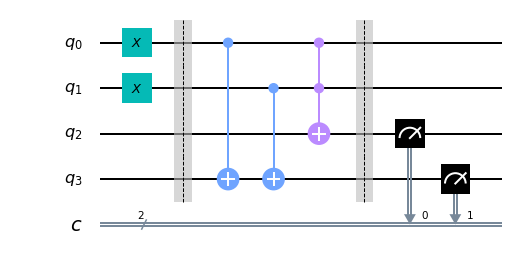

In [73]:
circuito_suma.draw(output='mpl')

In [75]:
proveedor = IBMQ.get_provider('ibm-q')
comp_cuantico = proveedor.get_backend('ibmq_essex')
ejecucion = execute(circuito_suma, backend = comp_cuantico, shots=1000)

job_monitor(ejecucion)

resultado = ejecucion.result() 
conteos = resultado.get_counts()

print(conteos)

Job Status: job has successfully run
{'11': 53, '00': 223, '01': 630, '10': 94}


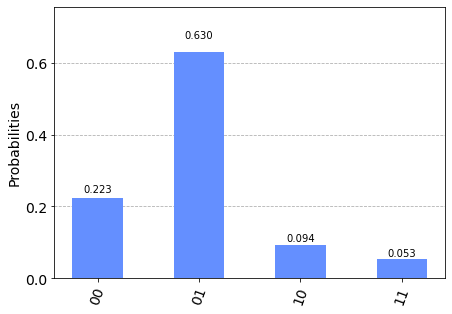

In [76]:
plot_histogram(conteos)

**Conclusión.** El resultado con probabilidad mayor de la suma nos dio 10, la cuál es la correcta ya que el cálculo explicito de la suma entre 1 y 1 va a dar 10, el resultado depende de las tablas booleanas XOR & AND. También se ven los diferentes respuestas erroneas que son generadas a factores externos y principalmente a que se generó la respuesta en un computador cuántico. 